# EDA 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## Preprocessing

In [4]:
df = pd.read_excel('../test_data_working_students.xlsx')
df.head()

,Record ID,year,month,MoleculeName,TradeName,ProductName,Packs,Value
0,1,2017,12,molecule1,brand1,SKU1,2966.0,32504.671461
1,2,2017,12,molecule2,brand2,SKU2,7675.0,5627.328111
2,3,2017,12,molecule2,brand2,SKU3,24404.0,10741.583225
3,4,2017,12,molecule3,brand3,SKU4,14775.0,65098.087341
4,5,2017,12,molecule3,brand3,SKU5,18206.0,61614.771981


In [ ]:
df.set_index("date", inplace=True)

df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
# df.set_index('date', inplace=True)

# df_monthly = df.groupby([df.index])['Value'].sum()

df['month_of_year'] = df['month']     
df['quarter'] = df['date'].dt.quarter  
df['week_of_year'] = df['date'].dt.isocalendar().week  

df['Value_Lag1']= df.groupby(['MoleculeName', 'TradeName', 'ProductName'])['Value'].shift(1)
df['Packs_Lag1']= df.groupby(['MoleculeName', 'TradeName', 'ProductName'])['Packs'].shift(1)     
  
df['Value_Rolling_3'] = df.groupby(['MoleculeName', 'TradeName', 'ProductName'])['Value'].transform(lambda x: x.rolling(3).mean()) 
df['Packs_Rolling_3'] = df.groupby(['MoleculeName', 'TradeName', 'ProductName'])['Packs'].transform(lambda x: x.rolling(3).mean())   
df['Value_Rolling_6'] = df.groupby(['MoleculeName', 'TradeName', 'ProductName'])['Value'].transform(lambda x: x.rolling(6).mean()) 
df['Packs_Rolling_6'] = df.groupby(['MoleculeName', 'TradeName', 'ProductName'])['Packs'].transform(lambda x: x.rolling(6).mean())    

#drop the nan values from lags/rolling transformations
df.dropna(subset=['Value_Lag1', 'Packs_Lag1', 'Value_Rolling_3', 'Packs_Rolling_3', 'Value_Rolling_6', 'Packs_Rolling_6'], inplace=True)   

 
encoder= OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['MoleculeName', 'TradeName', 'ProductName']])
df = df.reset_index(drop=True)
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['MoleculeName', 'TradeName', 'ProductName']))
df= pd.concat([df, encoded_df], axis=1)   



c:\Users\annap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
print("\nNumerical Summary:\n", df.describe())
print("\nCategorical Summary:\n", df.describe(include="object"))


Numerical Summary:
          Record ID         year        month          Packs         Value  \
count  3491.000000  3491.000000  3491.000000    3491.000000  3.491000e+03   
mean   2419.532799  2019.101404     7.045259   34782.903180  1.748480e+05   
min     615.000000  2018.000000     1.000000       3.000000  3.555653e-02   
25%    1513.500000  2018.000000     5.000000    1156.000000  1.185397e+04   
50%    2405.000000  2019.000000     7.000000    9287.000000  5.822237e+04   
75%    3316.500000  2020.000000    10.000000   32844.000000  1.786749e+05   
max    4259.000000  2020.000000    12.000000  452364.000000  3.450784e+06   
std    1049.356403     0.785999     3.326237   62946.798854  3.468236e+05   

                                date  month_of_year      quarter  \
count                           3491    3491.000000  3491.000000   
mean   2019-08-09 09:16:51.629905664       7.045259     2.670868   
min              2018-05-01 00:00:00       1.000000     1.000000   
25%          

In [7]:
print("\nSummary Statistics:")
print(df[['Packs', 'Value']].describe())


Summary Statistics:
               Packs         Value
count    3491.000000  3.491000e+03
mean    34782.903180  1.748480e+05
std     62946.798854  3.468236e+05
min         3.000000  3.555653e-02
25%      1156.000000  1.185397e+04
50%      9287.000000  5.822237e+04
75%     32844.000000  1.786749e+05
max    452364.000000  3.450784e+06


In [8]:
print("Dataset Overview:\n", df.info())   
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3491 entries, 0 to 3490
Columns: 254 entries, Record ID to ProductName_SKU99
dtypes: UInt32(1), datetime64[ns](1), float64(244), int32(1), int64(4), object(3)
memory usage: 6.7+ MB
Dataset Overview:
 None

Missing Values:
 Record ID            0
year                 0
month                0
MoleculeName         0
TradeName            0
                    ..
ProductName_SKU95    0
ProductName_SKU96    0
ProductName_SKU97    0
ProductName_SKU98    0
ProductName_SKU99    0
Length: 254, dtype: int64

Duplicate Rows: 0


## Molecule Name


Unique Molecule Names: 27


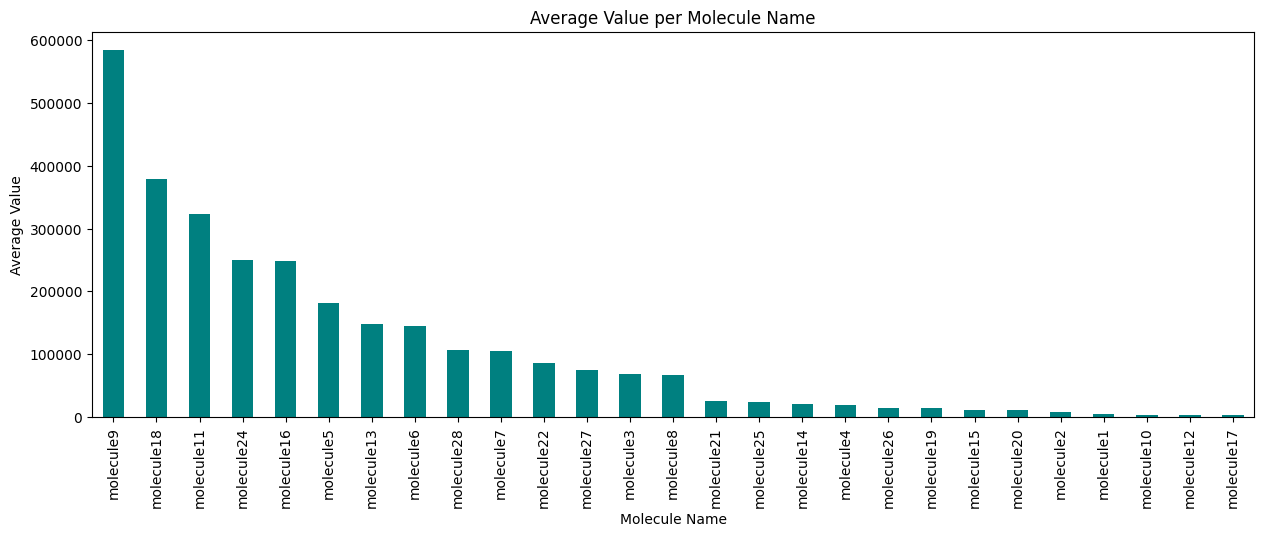

c:\Users\annap\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


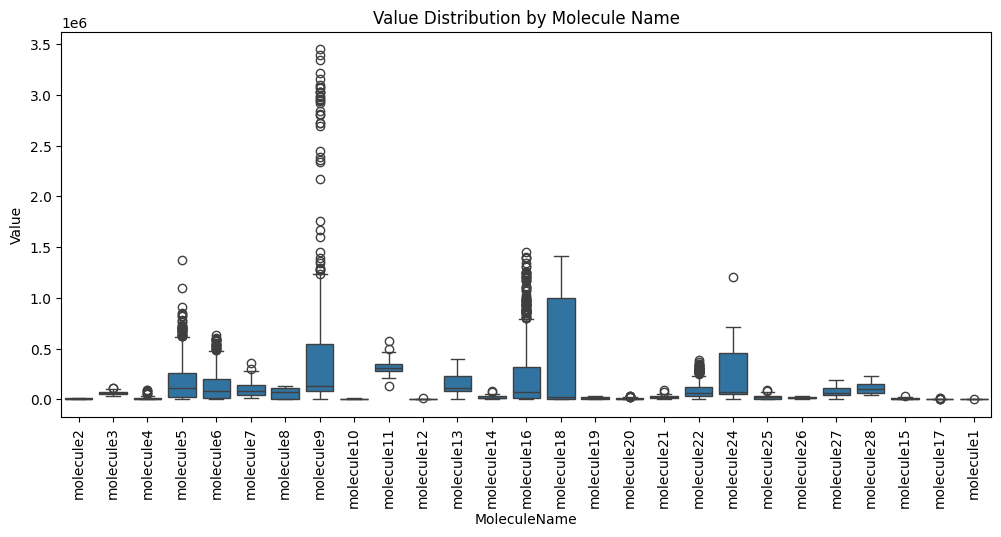

In [9]:
print("\nUnique Molecule Names:", df['MoleculeName'].nunique())

molecule_stats = df.groupby('MoleculeName')['Value'].mean().sort_values(ascending=False)


plt.figure(figsize=(15, 5))
molecule_stats.plot(kind='bar', color='teal')
plt.title('Average Value per Molecule Name')
plt.xlabel('Molecule Name') 
plt.ylabel('Average Value')
plt.xticks(rotation=90)  
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='MoleculeName', y='Value', data=df)
plt.xticks(rotation=90)
plt.title('Value Distribution by Molecule Name')  
plt.show()


## TradeName

In [10]:
print("Unique Trade Names:", df['TradeName'].nunique())
trade_stats = df.groupby('TradeName')['Value'].mean().sort_values(ascending=False)

Unique Trade Names: 66


In [11]:
tradename_stats=df.groupby("TradeName").agg(
    total_value=("Value", "sum"),
    total_packs=("Packs", "sum"),
    avg_value_per_pack=("Value", "mean"),
    count=("TradeName", "count")
).sort_values(by="total_value", ascending=False) 


print("Brand-Level Stats:")
print(tradename_stats.head(10))  

Brand-Level Stats:
            total_value  total_packs  avg_value_per_pack  count
TradeName                                                      
brand25    8.449064e+07    6669325.0        1.141765e+06     74
brand36    7.129028e+07   21671176.0        5.703222e+05    125
brand37    5.236570e+07   15030297.0        5.454760e+05     96
brand7     5.159937e+07   19388491.0        2.606029e+05    198
brand10    4.986363e+07    3331342.0        3.895596e+05    128
brand45    3.499919e+07    3338202.0        1.093725e+06     32
brand22    3.479752e+07    1264978.0        1.087423e+06     32
brand15    3.080166e+07    6314672.0        3.208506e+05     96
brand56    2.005284e+07   13974269.0        1.253302e+05    160
brand24    1.665209e+07    1431060.0        2.107859e+05     79


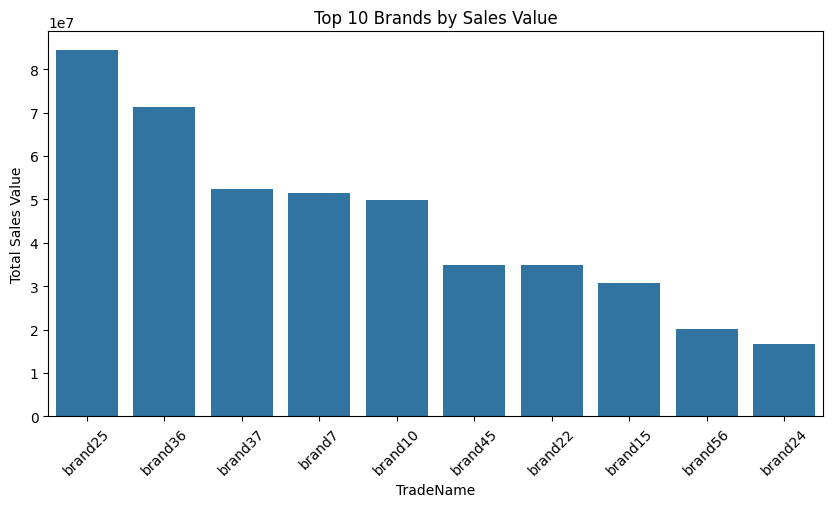

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x=tradename_stats.head(10).index, y=tradename_stats.head(10)["total_value"])
plt.xticks(rotation=45)
plt.xlabel("TradeName")
plt.ylabel("Total Sales Value")
plt.title("Top 10 Brands by Sales Value")
plt.show()

## ProductName

In [12]:
print("Unique Product Names:", df['ProductName'].nunique())
product_stats = df.groupby('ProductName')['Value'].mean().sort_values(ascending=False)
 

Unique Product Names: 143


In [13]:
product_stats = df.groupby("ProductName").agg(
    total_value=("Value", "sum"),
    total_packs=("Packs", "sum"),
    avg_value_per_pack=("Value", "mean"),
    count=("ProductName", "count")
).sort_values(by="total_value", ascending=False)

print("Product-Level Stats:")
print(product_stats.head(10))

Product-Level Stats:
              total_value  total_packs  avg_value_per_pack  count
ProductName                                                      
SKU66        5.649667e+07    4718305.0        1.765521e+06     32
SKU94        3.596342e+07   10703233.0        1.123857e+06     32
SKU109       3.499919e+07    3338202.0        1.093725e+06     32
SKU62        3.479752e+07    1264978.0        1.087423e+06     32
SKU98        2.769858e+07    7996019.0        8.655806e+05     32
SKU70        2.625525e+07    1491571.0        2.625525e+06     10
SKU91        2.560322e+07    5786105.0        8.001005e+05     32
SKU27        1.995577e+07    1209792.0        6.236179e+05     32
SKU17        1.868482e+07    8181950.0        5.839007e+05     32
SKU96        1.829656e+07    4176541.0        5.717674e+05     32


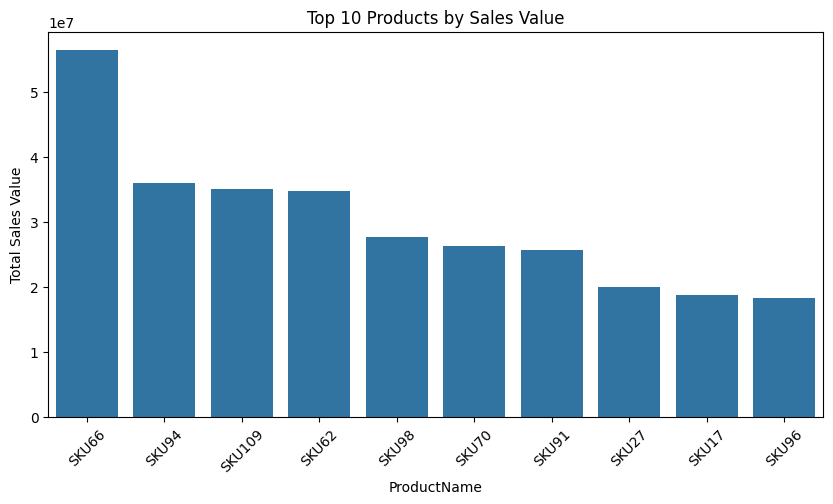

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x=product_stats.head(10).index, y=product_stats.head(10)["total_value"])
plt.xticks(rotation=45)
plt.xlabel("ProductName")
plt.ylabel("Total Sales Value")
plt.title("Top 10 Products by Sales Value")
plt.show()

## Packs & Values

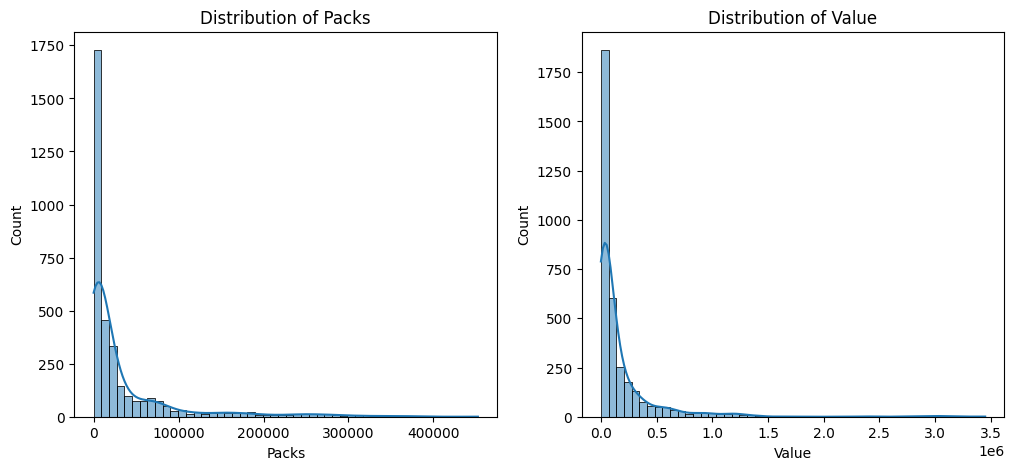

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Packs'], bins=50, kde=True)
plt.title('Distribution of Packs')

plt.subplot(1, 2, 2)
sns.histplot(df['Value'], bins=50, kde=True)
plt.title('Distribution of Value')

plt.show()

c:\Users\annap\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\annap\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


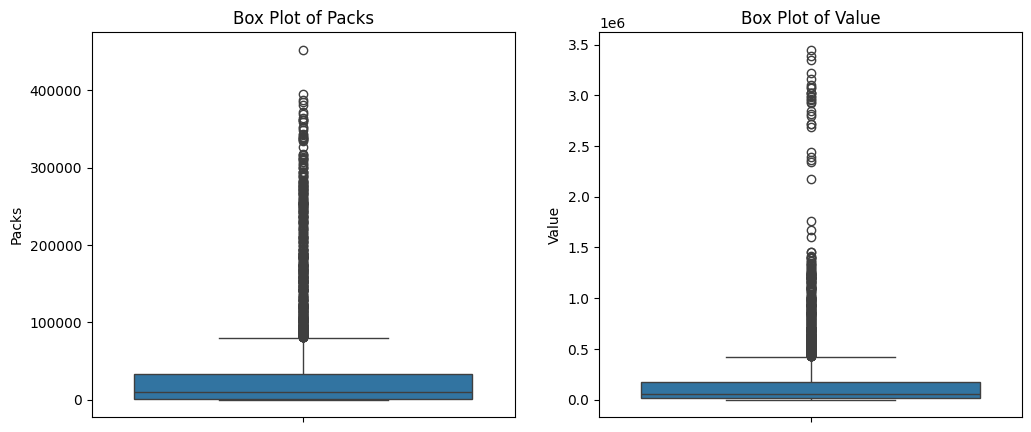

In [15]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Packs'])
plt.title('Box Plot of Packs')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Value'])
plt.title('Box Plot of Value')

plt.show()

### Time Series Analysis

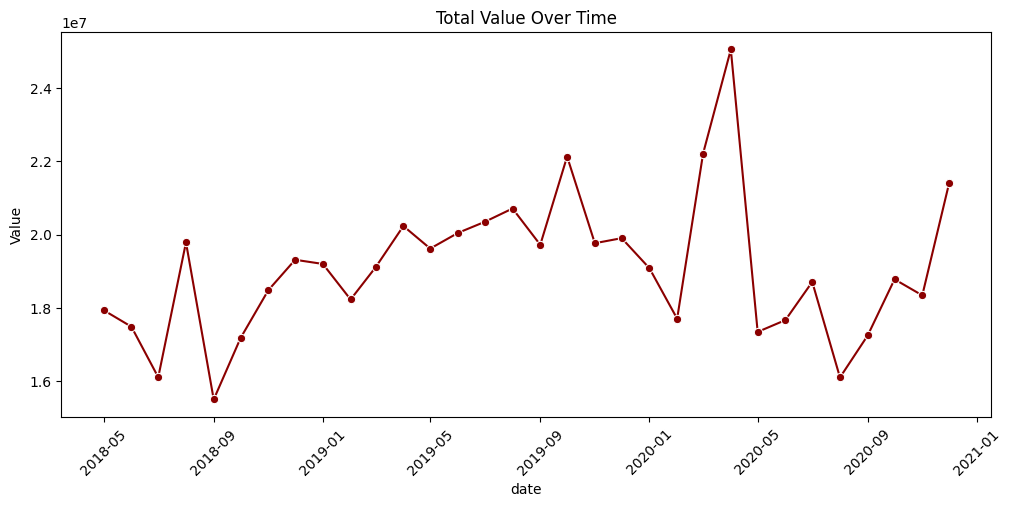

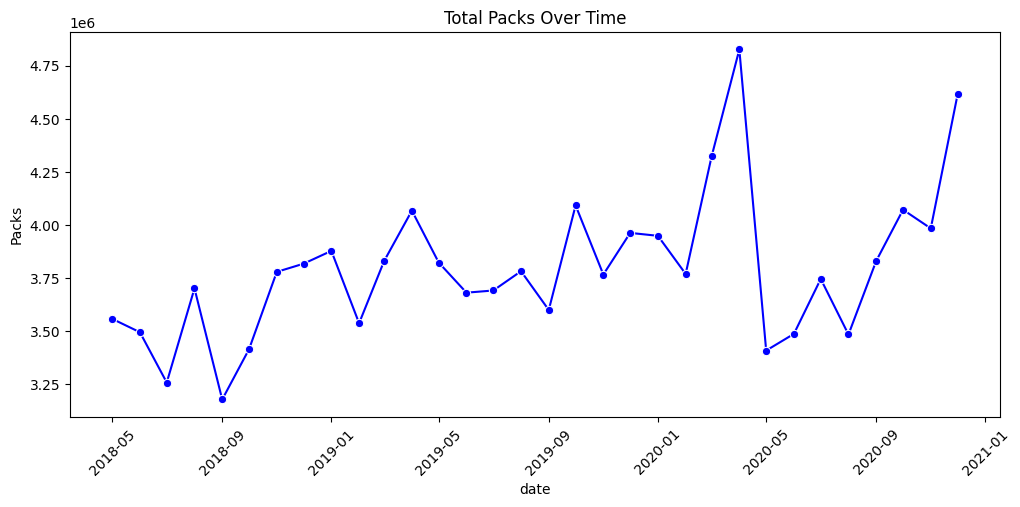

In [16]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
df_time = df.groupby('date')[['Packs', 'Value']].sum().reset_index()
 

plt.figure(figsize=(12, 5)) 
sns.lineplot(x='date', y='Value', data=df_time, marker='o', color='darkred')
plt.title("Total Value Over Time")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='Packs', data=df_time, marker='o', color='blue')  
plt.title("Total Packs Over Time") 
plt.xticks(rotation=45)
plt.show()  

### Correlation Analysis

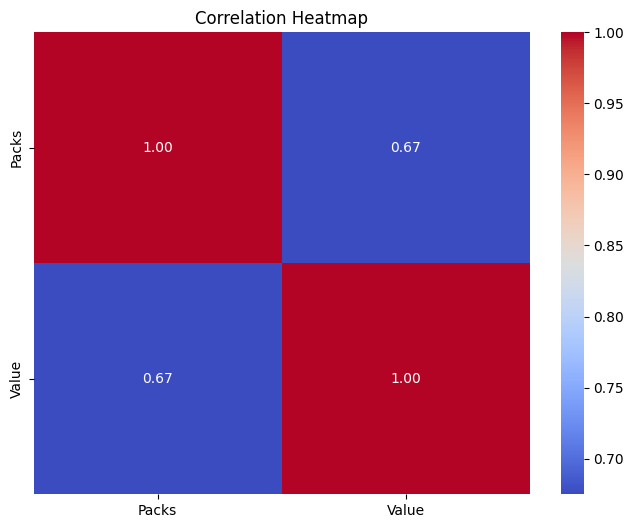

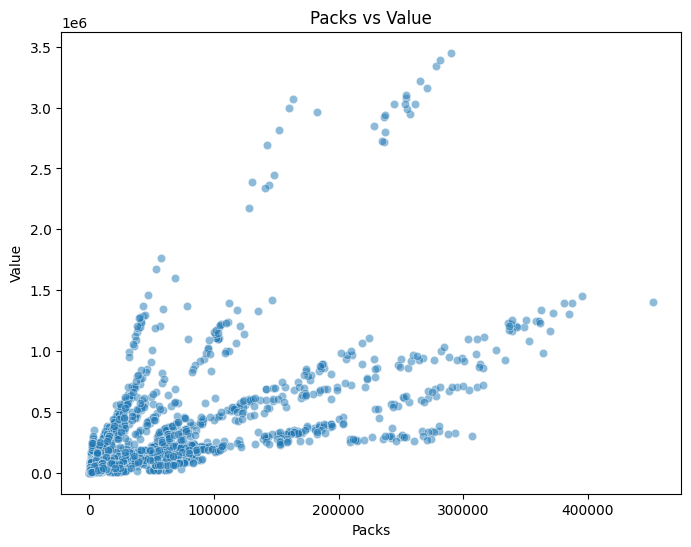

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Packs', 'Value']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Packs'], y=df['Value'], alpha=0.5)
plt.title("Packs vs Value")
plt.show()